# Проект за Sentiment Analysis върху данни от Movie Reviews

In [2]:
import string
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import tarfile
import matplotlib.pyplot as plt
import urllib.request
from sklearn.linear_model import RidgeClassifier
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

Нека първо да свалим данните от "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz" и след това да ги разархивираме

In [3]:
url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
urllib.request.urlretrieve(url, "aclImdb_v1.tar.gz")

('aclImdb_v1.tar.gz', <http.client.HTTPMessage at 0x1f67b8c9370>)

In [4]:
tar = tarfile.open("aclImdb_v1.tar.gz", "r:gz")
tar.extractall()
tar.close()

Ще дефинираме функция за preprocessing на нашия текст

In [9]:
def preprocess(text):
  text = ''.join([c for c in text if c not in string.punctuation])
  text = text.lower()
  return text

Сега нека заредим съотвено готовите данни съответно разделени на train и test

In [10]:
X_train_before_vectorizing = []
y_train = []
X_test_before_vectorizing = []
y_test = []


for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'train', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      review = preprocess(review)
      X_train_before_vectorizing.append(review)
      y_train.append(1 if sentiment == 'pos' else 0)

for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'test', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      review = preprocess(review)
      X_test_before_vectorizing.append(review)
      y_test.append(1 if sentiment == 'pos' else 0)

След като вече имаме заредени данните, ще трансформираме текста използвайки CountVectorizer

In [11]:
vectorizer = CountVectorizer()
X_train_CountVectorizer = vectorizer.fit_transform(X_train_before_vectorizing)
X_test_CountVectorizer = vectorizer.transform(X_test_before_vectorizing)

Нека натренираме модела и да видим как се справя

In [12]:
model = LogisticRegression()
model.fit(X_train_CountVectorizer, y_train)
accuracy = model.score(X_test_CountVectorizer, y_test)
print('Accuracy: {:.3f}'.format(accuracy))     

Accuracy: 0.869


C:\Users\Martin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Тъй като виждаме, че е достигнал лимита на итерации, ще пробваме с по-голям лимит, да видим дали ще пробмени резултата

In [13]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train_CountVectorizer, y_train)
accuracy = model.score(X_test_CountVectorizer, y_test)
print('Accuracy: {:.3f}'.format(accuracy)) 

Accuracy: 0.872


Нека сега пробваме с различни стойности на C

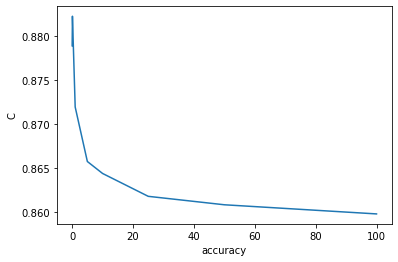

In [17]:
x_axis = []
y_axis = []
for c in [100, 50, 25, 10, 5, 1.0, 0.1, 0.01]:
    model = LogisticRegression(C=c, max_iter=3000)
    model.fit(X_train_CountVectorizer, y_train)
    accuracy = model.score(X_test_CountVectorizer, y_test)
    x_axis.append(c)
    y_axis.append(accuracy)
    
plt.close()
plt.xlabel("accuracy")
plt.ylabel("C")
plt.plot(x_axis, y_axis)

Виждаме, че с увеличаване на C резултатите намаляват. Сега ще използваме TfidfVectorizer за трансформиране на текста.

In [39]:
vectorizer = TfidfVectorizer()
X_train_TfidfVectorizer = vectorizer.fit_transform(X_train_before_vectorizing)
X_test_TfidfVectorizerr = vectorizer.transform(X_test_before_vectorizing)

In [48]:
model = LogisticRegression()
model.fit(X_train_TfidfVectorizer, y_train)
accuracy = model.score(X_test_TfidfVectorizerr, y_test)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.875


Виждаме, че TfidfVectorizer имаме малко по-добри резултати.

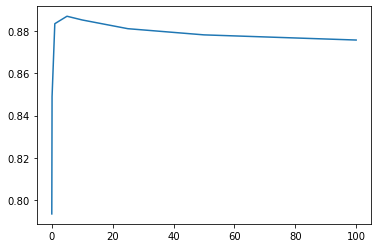

In [11]:
x_axis = []
y_axis = []
for c in [100, 50, 25, 10, 5, 1.0, 0.1, 0.01]:
    model = LogisticRegression(C=c, max_iter=3000)
    model.fit(X_train_TfidfVectorizer, y_train)
    accuracy = model.score(X_test_TfidfVectorizerr, y_test)
    x_axis.append(c)
    y_axis.append(accuracy)

plt.close()
plt.plot(x_axis, y_axis)    

In [ ]:
За разлика от CountVectorizer, тука виждаме, че при прекалена ниска стойност на C, резултатите
спадат драстично, а при C>1 са приблизителни.

In [40]:
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,100]:
    model = RidgeClassifier(alpha=alpha)
    model.fit(X_train_TfidfVectorizer, y_train)
    accuracy = model.score(X_test_TfidfVectorizerr, y_test)
    print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.832
Accuracy: 0.848
Accuracy: 0.856
Accuracy: 0.862
Accuracy: 0.868
Accuracy: 0.871
Accuracy: 0.874
Accuracy: 0.876
Accuracy: 0.878
Accuracy: 0.879
Accuracy: 0.827


In [41]:
model = RidgeClassifier()
model.fit(X_train_TfidfVectorizer, y_train)
accuracy = model.score(X_test_TfidfVectorizerr, y_test)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.879


In [42]:
for i in [0.1, 0.3, 0.5, 0.7, 0.9]:
    model = linear_model.RidgeClassifier(alpha=i)
    model.fit(X_train_TfidfVectorizer, y_train)
    accuracy = model.score(X_test_TfidfVectorizerr, y_test)
    print('Accuracy with alpha = {:.2f} : {:.3f}'.format(i, accuracy))

Accuracy with alpha = 0.10 : 0.832
Accuracy with alpha = 0.30 : 0.856
Accuracy with alpha = 0.50 : 0.868
Accuracy with alpha = 0.70 : 0.874
Accuracy with alpha = 0.90 : 0.878


In [ ]:
Ще видим как ще се справи модела с различни параметри на vectorizer-ите

In [43]:
vectorizer = TfidfVectorizer(ngram_range = (1, 3))
X_train_TfidfVectorizer = vectorizer.fit_transform(X_train_before_vectorizing)
X_test_TfidfVectorizerr = vectorizer.transform(X_test_before_vectorizing)

In [44]:
for i in [0.1, 0.3, 0.5, 0.7, 0.9]:
    model = linear_model.RidgeClassifier(alpha=i)
    model.fit(X_train_TfidfVectorizer, y_train)
    accuracy = model.score(X_test_TfidfVectorizerr, y_test)
    print('Accuracy with alpha = {:.2f} : {:.3f}'.format(i, accuracy))

Accuracy with alpha = 0.10 : 0.905
Accuracy with alpha = 0.30 : 0.904
Accuracy with alpha = 0.50 : 0.903
Accuracy with alpha = 0.70 : 0.901
Accuracy with alpha = 0.90 : 0.900


Тъй като видяхме, че има подобрение с промяната на параметъра ngram_range, ще изробваме няколко различни комбинации.

In [57]:
ngram_range_possibilities = []
for i in range(4):
    for j in range(4):
        if i <= j:
            ngram_range_possibilities.append((i + 1, j + 1))

In [64]:
for ngram_range in ngram_range_possibilities:
    vectorizer = TfidfVectorizer(ngram_range = ngram_range)
    X_train_TfidfVectorizer = vectorizer.fit_transform(X_train_before_vectorizing)
    X_test_TfidfVectorizerr = vectorizer.transform(X_test_before_vectorizing)
    print("Results with  ngrange = {0}".format(ngram_range))
    for i in [0.1, 0.3, 0.5, 0.7, 0.9]:
        model = linear_model.RidgeClassifier(alpha=i)
        model.fit(X_train_TfidfVectorizer, y_train)
        accuracy = model.score(X_test_TfidfVectorizerr, y_test)
        print('Accuracy with alpha = {:.2f} : {:.3f}'.format(i, accuracy))

Results with  ngrange = (1, 1)
Accuracy with alpha = 0.10 : 0.832
Accuracy with alpha = 0.30 : 0.856
Accuracy with alpha = 0.50 : 0.868
Accuracy with alpha = 0.70 : 0.874
Accuracy with alpha = 0.90 : 0.878
Results with  ngrange = (1, 2)
Accuracy with alpha = 0.10 : 0.899
Accuracy with alpha = 0.30 : 0.901
Accuracy with alpha = 0.50 : 0.902
Accuracy with alpha = 0.70 : 0.902
Accuracy with alpha = 0.90 : 0.902
Results with  ngrange = (1, 3)
Accuracy with alpha = 0.10 : 0.905
Accuracy with alpha = 0.30 : 0.904
Accuracy with alpha = 0.50 : 0.903
Accuracy with alpha = 0.70 : 0.901
Accuracy with alpha = 0.90 : 0.900
Results with  ngrange = (1, 4)
Accuracy with alpha = 0.10 : 0.902
Accuracy with alpha = 0.30 : 0.899
Accuracy with alpha = 0.50 : 0.897
Accuracy with alpha = 0.70 : 0.895
Accuracy with alpha = 0.90 : 0.893
Results with  ngrange = (2, 2)
Accuracy with alpha = 0.10 : 0.888
Accuracy with alpha = 0.30 : 0.888
Accuracy with alpha = 0.50 : 0.889
Accuracy with alpha = 0.70 : 0.888
Accur

Резултатите с ngrange = (1,3) са най-добри, като всички надхвърлят 90%.

In [45]:
vectorizer = CountVectorizer(ngram_range = (1, 3))
X_train_CountVectorizer = vectorizer.fit_transform(X_train_before_vectorizing)
X_test_CountVectorizer = vectorizer.transform(X_test_before_vectorizing)

In [65]:
for ngram_range in ngram_range_possibilities:
    vectorizer = CountVectorizer(ngram_range = ngram_range)
    X_train_CountVectorizer = vectorizer.fit_transform(X_train_before_vectorizing)
    X_test_CountVectorizer = vectorizer.transform(X_test_before_vectorizing)
    print("Results with  ngrange = {0}".format(ngram_range))
    for i in [0.1, 0.3, 0.5, 0.7, 0.9]:
        model = linear_model.RidgeClassifier(alpha=i)
        model.fit(X_train_CountVectorizer, y_train)
        accuracy = model.score(X_test_CountVectorizer, y_test)
        print('Accuracy with alpha = {:.2f} : {:.3f}'.format(i, accuracy))

Results with  ngrange = (1, 1)
Accuracy with alpha = 0.10 : 0.744
Accuracy with alpha = 0.30 : 0.758
Accuracy with alpha = 0.50 : 0.767
Accuracy with alpha = 0.70 : 0.774
Accuracy with alpha = 0.90 : 0.779
Results with  ngrange = (1, 2)
Accuracy with alpha = 0.10 : 0.870
Accuracy with alpha = 0.30 : 0.870
Accuracy with alpha = 0.50 : 0.870
Accuracy with alpha = 0.70 : 0.871
Accuracy with alpha = 0.90 : 0.871
Results with  ngrange = (1, 3)
Accuracy with alpha = 0.10 : 0.891
Accuracy with alpha = 0.30 : 0.891
Accuracy with alpha = 0.50 : 0.891
Accuracy with alpha = 0.70 : 0.891
Accuracy with alpha = 0.90 : 0.891
Results with  ngrange = (1, 4)
Accuracy with alpha = 0.10 : 0.896
Accuracy with alpha = 0.30 : 0.896
Accuracy with alpha = 0.50 : 0.895
Accuracy with alpha = 0.70 : 0.895
Accuracy with alpha = 0.90 : 0.895
Results with  ngrange = (2, 2)
Accuracy with alpha = 0.10 : 0.861
Accuracy with alpha = 0.30 : 0.861
Accuracy with alpha = 0.50 : 0.861
Accuracy with alpha = 0.70 : 0.862
Accur

Виждаме, че използвайки TfIdf vectorizer-a с различен ngrange_range, дава по-добри резултати, за разлика от countVectorize.  Резултатите са доста добри, но нека пробваме и с други алгоритми, като например
Найвен Бейсов и MLPClassifier.

In [72]:
X_train_before_vectorizing = []
y_train = []
X_test_before_vectorizing = []
y_test = []

for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'train', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      review = preprocess(review)
      X_train_before_vectorizing.append(review)
      y_train.append(1 if sentiment == 'pos' else 0)

for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'test', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      review = preprocess(review)
      X_test_before_vectorizing.append(review)
      y_test.append(1 if sentiment == 'pos' else 0)
        

vectorizer = TfidfVectorizer(ngram_range = (1, 3))
X_train_TfidfVectorizer = vectorizer.fit_transform(X_train_before_vectorizing)
X_test_TfidfVectorizerr = vectorizer.transform(X_test_before_vectorizing)

In [73]:
clf = MultinomialNB()
clf.fit(X_train_TfidfVectorizer, y_train)

accuracy = clf.score(X_test_TfidfVectorizerr, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.87852


In [74]:
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=100)
clf.fit(X_train_TfidfVectorizer, y_train)
accuracy = clf.score(X_test_TfidfVectorizerr, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.90488


За разлика от Бейсовия класификатор, невронната мрежа се спрая по-добре.
Нека пробваме със стемиране и лематизация

In [5]:
def stem_text(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    words = ' '.join([c for c in stemmed_words])
    return words

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    words = ' '.join([c for c in words])
    return words

Първо да пробваме само със стемиране

In [16]:
X_train_before_vectorizing = []
y_train = []
X_test_before_vectorizing = []
y_test = []


for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'train', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      review = stem_text(review)
      X_train_before_vectorizing.append(review)
      y_train.append(1 if sentiment == 'pos' else 0)

for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'test', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      review = stem_text(review)
      X_test_before_vectorizing.append(review)
      y_test.append(1 if sentiment == 'pos' else 0)

In [17]:
vectorizer = CountVectorizer(ngram_range = (1, 3), stop_words='english')
X_train_CountVectorizer = vectorizer.fit_transform(X_train_before_vectorizing)
X_test_CountVectorizer = vectorizer.transform(X_test_before_vectorizing)

In [20]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train_CountVectorizer, y_train)
accuracy = model.score(X_test_CountVectorizer, y_test)
print('Accuracy: {:.3f}'.format(accuracy)) 

Accuracy: 0.882


In [22]:
vectorizer = TfidfVectorizer(ngram_range = (1, 3))
X_train_TfidfVectorizer = vectorizer.fit_transform(X_train_before_vectorizing)
X_test_TfidfVectorizerr = vectorizer.transform(X_test_before_vectorizing)

In [23]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train_TfidfVectorizer, y_train)
accuracy = model.score(X_test_TfidfVectorizerr, y_test)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.878


In [24]:
model = linear_model.RidgeClassifier()
model.fit(X_train_TfidfVectorizer, y_train)
accuracy = model.score(X_test_TfidfVectorizerr, y_test)
print('Accuracy with Tfidf: {:.3f}'.format(accuracy))

model.fit(X_train_CountVectorizer, y_train)
accuracy = model.score(X_test_CountVectorizer, y_test)
print('Accuracy with count vectorizer: {:.3f}'.format(accuracy))

Accuracy with Tfidf: 0.900
Accuracy with count vectorizer: 0.873


In [ ]:
for i in [0.1, 0.3, 0.5, 0.7, 0.9]:
    model = linear_model.RidgeClassifier(alpha=i)
    model.fit(X_train_TfidfVectorizer, y_train)
    accuracy = model.score(X_test_TfidfVectorizerr, y_test)
    print('Accuracy with alpha = {:.2f} : {:.3f}'.format(i, accuracy))

Сега да пробваме с лематизация

In [25]:
X_train_before_vectorizing = []
y_train = []
X_test_before_vectorizing = []
y_test = []


for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'train', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      review = lemmatize_text(review)
      X_train_before_vectorizing.append(review)
      y_train.append(1 if sentiment == 'pos' else 0)

for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'test', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      review = lemmatize_text(review)
      X_test_before_vectorizing.append(review)
      y_test.append(1 if sentiment == 'pos' else 0)

In [26]:
vectorizer = CountVectorizer(ngram_range = (1, 3), stop_words='english')
X_train_CountVectorizer = vectorizer.fit_transform(X_train_before_vectorizing)
X_test_CountVectorizer = vectorizer.transform(X_test_before_vectorizing)

In [27]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train_CountVectorizer, y_train)
accuracy = model.score(X_test_CountVectorizer, y_test)
print('Accuracy with countVectorizer: {:.3f}'.format(accuracy)) 

Accuracy: 0.876


In [28]:
vectorizer = TfidfVectorizer(ngram_range = (1, 3))
X_train_TfidfVectorizer = vectorizer.fit_transform(X_train_before_vectorizing)
X_test_TfidfVectorizerr = vectorizer.transform(X_test_before_vectorizing)

In [29]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train_TfidfVectorizer, y_train)
accuracy = model.score(X_test_TfidfVectorizerr, y_test)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.868


In [30]:
model = linear_model.RidgeClassifier()
model.fit(X_train_TfidfVectorizer, y_train)
accuracy = model.score(X_test_TfidfVectorizerr, y_test)
print('Accuracy with Tfidf: {:.3f}'.format(accuracy))

model.fit(X_train_CountVectorizer, y_train)
accuracy = model.score(X_test_CountVectorizer, y_test)
print('Accuracy with count vectorizer: {:.3f}'.format(accuracy))

Accuracy with Tfidf: 0.885
Accuracy with count vectorizer: 0.865


In [34]:
for i in [ 0.1, 0.3, 0.5, 0.7, 0.9]:
    model = linear_model.RidgeClassifier(alpha=i)
    model.fit(X_train_TfidfVectorizer, y_train)
    accuracy = model.score(X_test_TfidfVectorizerr, y_test)
    print('Accuracy with alpha = {:.2f} : {:.3f}'.format(i, accuracy))

Accuracy with alpha = 0.10 : 0.887
Accuracy with alpha = 0.30 : 0.888
Accuracy with alpha = 0.50 : 0.887
Accuracy with alpha = 0.70 : 0.887
Accuracy with alpha = 0.90 : 0.886


In [28]:
X_train = []
y_train = []
X_test = []
y_test = []

for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'train', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      X_train.append(review)
      y_train.append(1 if sentiment == 'pos' else 0)

for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'test', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      X_test.append(review)
      y_test.append(1 if sentiment == 'pos' else 0)




In [38]:
import pandas as pd

X_train = []
y_train = []
X_test = []
y_test = []

for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'train', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      X_train.append(review)
      y_train.append(1 if sentiment == 'pos' else 0)

for sentiment in ['pos', 'neg']:
  path = os.path.join('aclImdb', 'test', sentiment)
  for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf8') as f:
      review = f.read()
      X_test.append(review)
      y_test.append(1 if sentiment == 'pos' else 0)

all_reviews = X_train + X_test
all_sentiments = y_train + y_test

df = pd.DataFrame({
    'review':all_reviews,
    'sentiment':all_sentiments})

print(df.head(10))


                                              review  sentiment
0  Bromwell High is a cartoon comedy. It ran at t...          1
1  Homelessness (or Houselessness as George Carli...          1
2  Brilliant over-acting by Lesley Ann Warren. Be...          1
3  This is easily the most underrated film inn th...          1
4  This is not the typical Mel Brooks film. It wa...          1
5  This isn't the comedic Robin Williams, nor is ...          1
6  Yes its an art... to successfully make a slow ...          1
7  In this "critically acclaimed psychological th...          1
8  THE NIGHT LISTENER (2006) **1/2 Robin Williams...          1
9  You know, Robin Williams, God bless him, is co...          1


In [59]:
print(len(all_reviews))


50000


In [57]:
X_train = df.loc[:24999,'review'].values
X_test = df.loc[25000:,'review'].values

y_train = df.loc[:24999,'sentiment'].values
y_test = df.loc[25000:,'sentiment'].values



50000


In [58]:

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

total_reviews = []
total_reviews.extend(X_train)
total_reviews.extend(X_test)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(total_reviews)

max_length = max([len(s.split())for s in total_reviews])
vocab_size=len(tokenizer.word_index) +1

X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')


In [60]:

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
review_lines = list()
lines = df['review'].values.tolist()

for line in lines:
    tokens = word_tokenize(line)
    
    tokens = [ w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    review_lines.append(words)
    

In [61]:

sequences = tokenizer.texts_to_sequences(total_reviews)
word_index = tokenizer.word_index

print('found unique tokens %s' %len(word_index))


review_pad = pad_sequences(sequences,maxlen = max_length)
sentiment = df['sentiment'].values

print('shape of review tensor', review_pad.shape)
print('shape of sentiment tensor',sentiment.shape)

found unique tokens 124252
shape of review tensor (50000, 2470)
shape of sentiment tensor (50000,)


In [62]:
import gensim
DIM=100
model = gensim.models.Word2Vec(sentences=review_lines,vector_size=100,window=5,workers=15,min_count=1)



print('size : %d' % len(model.wv))

model.wv.save_word2vec_format('imdb_embedding_word2vec.txt',binary=False)

size : 133264


In [63]:
model.wv.most_similar('horrible')

[('terrible', 0.9160981774330139),
 ('awful', 0.844463586807251),
 ('horrendous', 0.76753169298172),
 ('atrocious', 0.7613363862037659),
 ('dreadful', 0.7581908702850342),
 ('sucks', 0.7558382749557495),
 ('pathetic', 0.7413936257362366),
 ('horrid', 0.7354460954666138),
 ('sucked', 0.722019374370575),
 ('bad', 0.7004726529121399)]

In [64]:
embedding_index = {}
file = open(os.path.join('', 'imdb_embedding_word2vec.txt'),encoding = "utf-8")
for line in file:
    val = line.split()
    word = val[0]
    coefs = np.asarray(val[1:])
    embedding_index[word] = coefs
file.close()

In [65]:
num_words = len(word_index) +1 
embedding_matrix = np.zeros((num_words,DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector=  embedding_index.get(word)
    
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers import Embedding
from keras.initializers import Constant
DIM= 100

model = Sequential()
embedding = Embedding(num_words,
                     DIM,
                     embeddings_initializer = Constant(embedding_matrix),
                     input_length = max_length,
                     trainable=False)

model.add(embedding)
model.add(GRU(units=32, dropout = 0.2,recurrent_dropout=0.2))
model.add(Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train_pad,y_train,batch_size=128,epochs=25,validation_data=(X_test_pad,y_test),verbose=2)

Epoch 1/25
